https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data
https://www.kaggle.com/datasets/gauravtopre/credit-card-defaulter-prediction
https://archive.ics.uci.edu/dataset/573/south+german+credit+update
https://www.kaggle.com/datasets/sid321axn/south-german-credit-updated/data

## Download the Data

In [1]:
import pandas as pd

df = pd.read_csv("data/german_credit.csv")

In [2]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Categorias para '{column}':\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")  

Categorias para 'status':

status
... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: count, dtype: int64

--------------------------------------------------

Categorias para 'credit_history':

credit_history
no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: count, dtype: int64

--------------------------------------------------

Categorias para 'purpose':

purpose
furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                

Tipo de Variable -Método de Tratamiento (a prior)
- Variables Ordinales Discretizadas Cuantitativas: Considerarlas como categóricas y aplicar OneHotEncoder o OrdinalEncoder si siguen un orden claro
- Variables Categoricas: OneHotEncoder
- Variables Numericas: StandardScaler

In [5]:
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


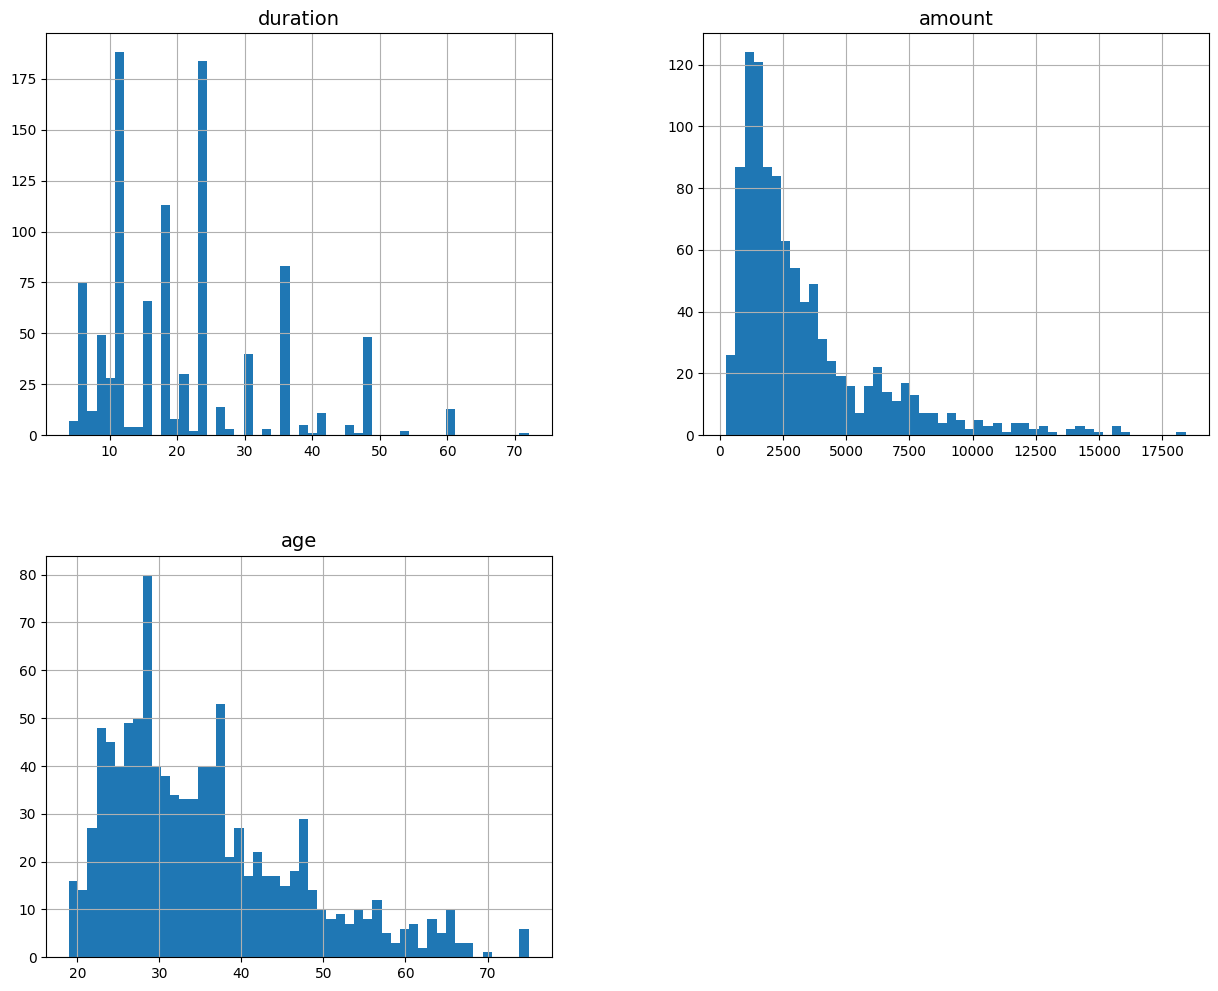

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(15,12))
plt.show()

## Create a Test Set 

Stratified Sampling

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df, test_size=0.2, stratify=df["credit_risk"], random_state=42)

SMOTE (Synthetic Minority Over-sampling Technique)

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train = train_set.drop('credit_risk', axis=1)
y_train = train_set['credit_risk']  

X_train_50, y_train_50 = ros.fit_resample(X_train, y_train)

In [9]:
def credit_risk_proportions(data):
    return data["credit_risk"].value_counts() / len(data)

smote = (y_train_50.value_counts() / len(y_train_50)).astype(float)

compare_props = pd.DataFrame({
    "Overall %": credit_risk_proportions(df),
    "Stratified %": credit_risk_proportions(test_set),
    "SMOTE %": smote,
}).sort_index()
compare_props.index.name = "Credit Risk"
(compare_props * 100).round(2)

,Overall %,Stratified %,SMOTE %
Credit Risk,,,
bad,30.0,30.0,50.0
good,70.0,70.0,50.0


We'll start using the stratified sample and comeback to the SMOTE sample in the event we need more "bad" category data to train our classifier.

## Discover and Visualize the Data to Gain Insights

In [10]:
credit = train_set.copy()

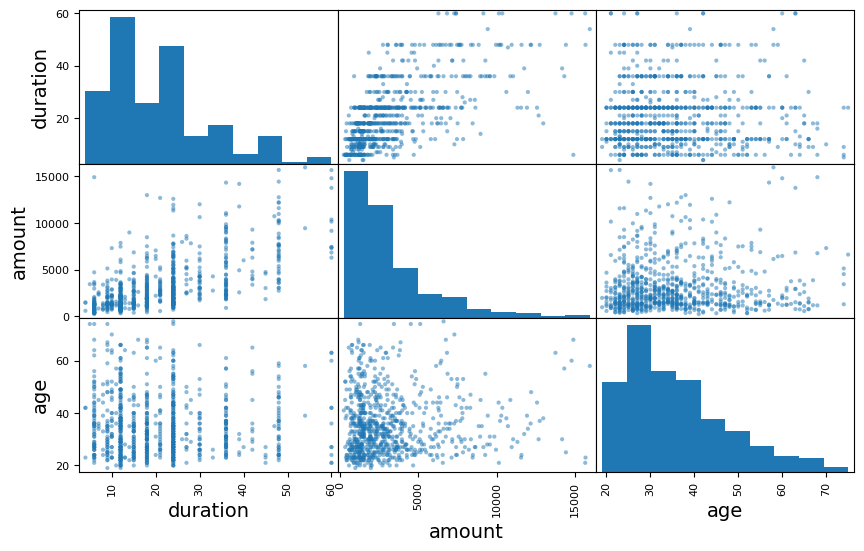

In [11]:
from pandas.plotting import scatter_matrix

numerical_columns = credit.select_dtypes(include=['int64']).columns
scatter_matrix(credit[numerical_columns], figsize=(10, 6))

plt.show()

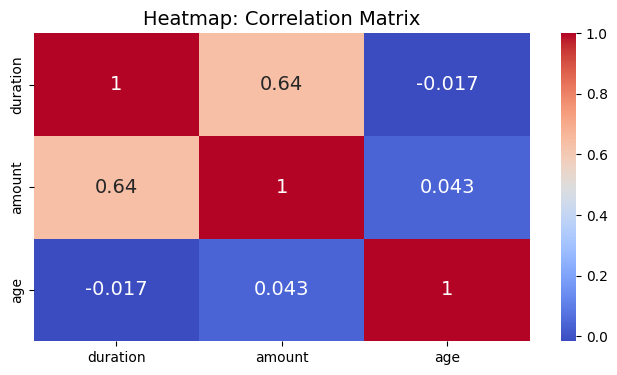

In [12]:
import seaborn as sns

correlation_matrix = credit[numerical_columns].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

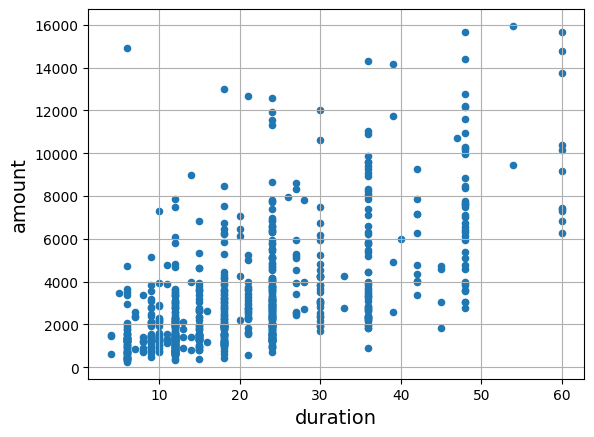

In [13]:
credit.plot(kind="scatter", x="duration", y="amount",
            grid=True)
plt.show()

## Prepare the Data for Machine Learning Algorithms

In [14]:
credit = train_set.drop("credit_risk", axis=1)
credit_label = train_set["credit_risk"].copy()

### Data Cleaning

In [15]:
import numpy as np

credit_num = credit.select_dtypes(include=[np.number])

In [16]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(credit_num)

In [17]:
np.sum(outlier_pred == -1)

186

In [18]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
credit_num_std_scaled = std_scaler.fit_transform(credit_num)

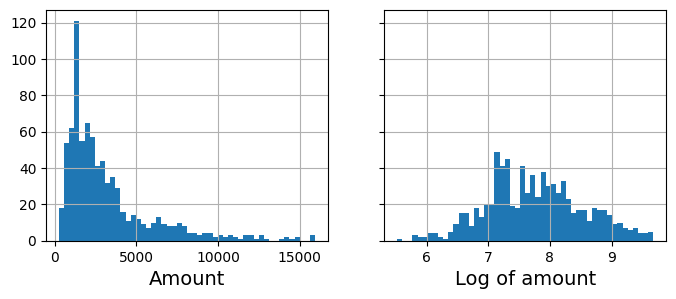

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
credit["amount"].hist(ax=axs[0], bins=50)
credit["amount"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Amount")
axs[1].set_xlabel("Log of amount")

plt.show()

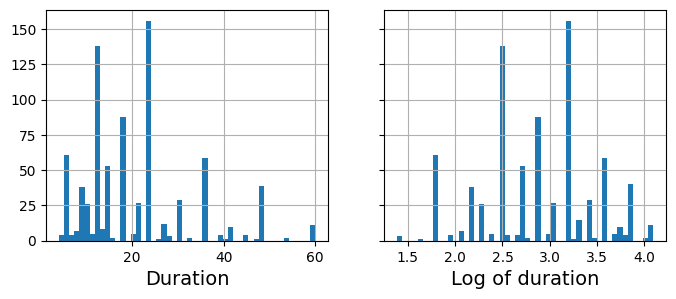

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
credit["duration"].hist(ax=axs[0], bins=50)
credit["duration"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Duration")
axs[1].set_xlabel("Log of duration")

plt.show()

In [21]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(credit[["duration"]])

In [22]:
log_pop[:2]

,duration
485,2.484907
510,1.791759


#### Handling Text and Categorical Attributes

In [23]:
credit['job'].value_counts()

job
skilled employee/official                     503
unskilled - resident                          160
manager/self-empl./highly qualif. employee    117
unemployed/unskilled - non-resident            20
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
credit_cat_1hot = cat_encoder.fit_transform(credit[['job']])

In [25]:
cat_encoder.categories_

[array(['manager/self-empl./highly qualif. employee',
        'skilled employee/official', 'unemployed/unskilled - non-resident',
        'unskilled - resident'], dtype=object)]

In [26]:
cat_encoder.feature_names_in_

array(['job'], dtype=object)

In [27]:
df_test_unknown = pd.DataFrame({"job": ["skilled employee/official", "unskilled - resident"]})

In [28]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [29]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [30]:
df_output

,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0


In [31]:
credit['employment_duration'].value_counts()

employment_duration
1 <= ... < 4 yrs    269
>= 7 yrs            202
4 <= ... < 7 yrs    141
< 1 yr              135
unemployed           53
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordered_categories = [['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']]

ordinal_encoder = OrdinalEncoder(categories=ordered_categories)
credit_cat_encoded = ordinal_encoder.fit_transform(credit[['employment_duration']])

In [33]:
credit_cat_encoded[:5]

array([[2.],
       [2.],
       [1.],
       [2.],
       [2.]])

In [34]:
ordinal_encoder.categories_

[array(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs',
        '>= 7 yrs'], dtype=object)]

#### Transformation Pipeline

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

cat_attribs = ['status', 'credit_history', 'purpose', 'savings', 'property', 'job',
                'other_debtors', 'other_installment_plans', 'housing', 'people_liable', 'telephone', 'foreign_worker']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


In [36]:
ordinal_columns = ['employment_duration', 'installment_rate', 'present_residence', 'number_credits']

categories_dict = {
    'employment_duration': ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
    'installment_rate': ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'],
    'present_residence': ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
    'number_credits': ['1', '3-Feb', '5-Apr', '>= 6']
}

In [37]:
ord_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=[categories_dict[col] for col in ordinal_columns]))

In [38]:
from sklearn.compose import ColumnTransformer

def column_ratio(X):
    X = np.array(X)
    ratio = X[:, 0] / X[:, 1]
    return ratio.reshape(-1, 1)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

preprocessing = ColumnTransformer([
        ("annual_amount", ratio_pipeline(), ["amount", "duration"]),
        ("log", log_pipeline, ["amount", "duration", "age"]),
        ("cat", cat_pipeline, cat_attribs),
        ("ord", ord_pipeline, ordinal_columns),
        ("drop_personal_status_sex", "drop", ["personal_status_sex"]) ,
    ],
    remainder='passthrough')

In [39]:
credit_prepared = preprocessing.fit_transform(credit)
credit_prepared.shape

(800, 55)

In [40]:
credit.shape

(800, 20)

In [41]:
preprocessing.get_feature_names_out()

array(['annual_amount__ratio', 'log__amount', 'log__duration', 'log__age',
       'cat__status_... < 0 DM',
       'cat__status_... >= 200 DM / salary for at least 1 year',
       'cat__status_0<= ... < 200 DM', 'cat__status_no checking account',
       'cat__credit_history_all credits at this bank paid back duly',
       'cat__credit_history_critical account/other credits elsewhere',
       'cat__credit_history_delay in paying off in the past',
       'cat__credit_history_existing credits paid back duly till now',
       'cat__credit_history_no credits taken/all credits paid back duly',
       'cat__purpose_business', 'cat__purpose_car (new)',
       'cat__purpose_car (used)', 'cat__purpose_domestic appliances',
       'cat__purpose_furniture/equipment', 'cat__purpose_others',
       'cat__purpose_radio/television', 'cat__purpose_repairs',
       'cat__purpose_retraining', 'cat__purpose_vacation',
       'cat__savings_... <  100 DM', 'cat__savings_... >= 1000 DM',
       'cat__savings

## Select and Train a Classifier

In [42]:
y_test = test_set["credit_risk"].copy()
X_train = credit.copy()

y_train_good = (credit_label == 'good') 
y_test_good = (y_test == 'good')

### Training a Binary Classifier

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(preprocessing, SGDClassifier(random_state=42)) 
sgd_clf.fit(X_train, y_train_good)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('annual_amount',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                       func=<function column_ratio at 0x11a0e8e00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'duration']),
                                                 ('log',
                                                  Pipeline(steps=[('...
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '25',
                                                                                               '25 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '35',
                                                                                               '>= '
                                                                                               '35'],
                                                                                              ['< '
                                                                                               '1 '
                                                                                               'yr',
                                                                                               '1 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '4 '
                                                                                               'yrs',
                                                                                               '4 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '7 '
                                                                                               'yrs',
                                                                                               '>= '
                                                                                               '7 '
                                                                                               'yrs'],
                                                                                              ['1',
                                                                

In [44]:
sample = X_train.iloc[:1]

In [45]:
credit_label[0]

'good'

In [46]:
sgd_clf.predict(sample)

array([ True])

### Performance Measures

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_good, cv=3, scoring="accuracy")

scores

array([0.65543071, 0.54307116, 0.76315789])

In [48]:
mean_score = np.mean(scores)

mean_score

0.6538865891320061

The model presents an average of 65.39% accuracy (correct predictions / total predictions)

In [49]:
from sklearn.dummy import DummyClassifier

dummy_clf = make_pipeline(preprocessing, DummyClassifier())
dummy_clf.fit(X_train, y_train_good)
print(any(dummy_clf.predict(X_train)))

True


The dummy classfier classifies every insntance in the most frequent class --> "good credit risk"

In [50]:
scores = cross_val_score(dummy_clf, X_train, y_train_good, cv=3, scoring="accuracy")

mean_score = np.mean(scores)

print(scores, mean_score)

[0.70037453 0.70037453 0.69924812] 0.6999990613237213


As the train set had 70% of instances under good credit risk, a classifier that predits all instances to be good, will be right 70% of the time

What'll happen if we train our classifier with the 50-50 training set?

In [51]:
y_train_good_50 = (y_train_50 == 'good')

In [52]:
sgd_clf_50 = make_pipeline(preprocessing, SGDClassifier(random_state=42)) 
sgd_clf_50.fit(X_train_50, y_train_good_50)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('annual_amount',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                       func=<function column_ratio at 0x11a0e8e00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'duration']),
                                                 ('log',
                                                  Pipeline(steps=[('...
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '25',
                                                                                               '25 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '35',
                                                                                               '>= '
                                                                                               '35'],
                                                                                              ['< '
                                                                                               '1 '
                                                                                               'yr',
                                                                                               '1 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '4 '
                                                                                               'yrs',
                                                                                               '4 '
                                                                                               '<= '
                                                                                               '... '
                                                                                               '< '
                                                                                               '7 '
                                                                                               'yrs',
                                                                                               '>= '
                                                                                               '7 '
                                                                                               'yrs'],
                                                                                              ['1',
                                                                

In [53]:
cross_val_score(sgd_clf, X_train_50, y_train_good_50, cv=3, scoring="accuracy")

array([0.56417112, 0.72117962, 0.6997319 ])

In [54]:
mean_score = np.mean(cross_val_score(sgd_clf, X_train_50, y_train_good_50, cv=3, scoring="accuracy"))

mean_score

0.6616942170482621

### Confusion Matrix

In [55]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_good, cv=3)

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_good, y_train_pred)
cm

array([[155,  85],
       [192, 368]])

Each row represents an actual class, while each column represents a predicted class

Therefore:
- 155 were correctly classified as bad credit risk (TN)
- 85 were incorrectly classified as good credit risk being bad credit risk (FP)
- 192 were incorrectly classfied as bad credit risk beeing good credit risk (FN)
- 368 were correctly classified as good credit risk (TP)

### Precision and Recall

precision = TP / (TP + FP); of all positives predicted, how many were true?

In [57]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_good, y_train_pred)

0.8123620309050773

In [58]:
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8123620309050773

recall = TP / (TP + FN); of all real positives, how many were correctly detected by the classifier?

In [59]:
recall_score(y_train_good, y_train_pred)

0.6571428571428571

- When it claims that it is a good credit risk, it is correct 81% of the time (precision)
- It detects 65% of the good credit risks (recall)

In [60]:
from sklearn.metrics import f1_score

f1_score(y_train_good, y_train_pred)

0.7265547877591313

- For a high F1 score, both recall and precision must be high

In [61]:
y_scores = sgd_clf.decision_function(sample)
y_scores

array([4.32044505])

In [62]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_good, cv=3,
                             method="decision_function")

In [63]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

In [64]:
threshold = 4

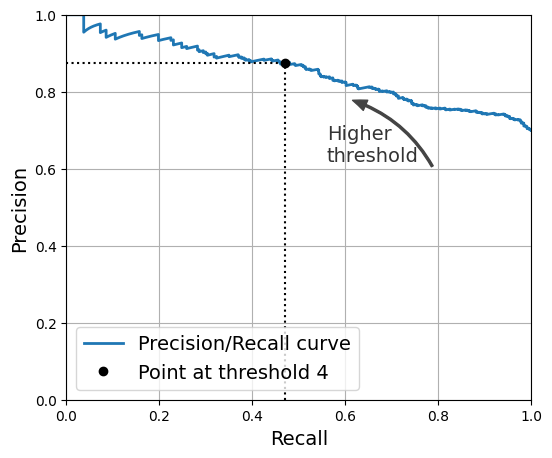

In [65]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 4")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [66]:
y_scores = cross_val_predict(sgd_clf, X_train_50, y_train_good_50, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_good_50, y_scores)

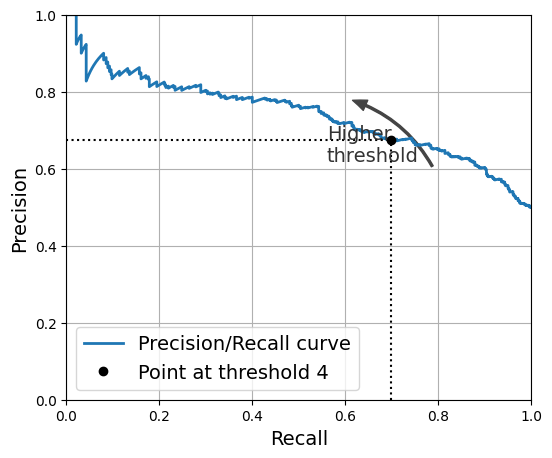

In [67]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 4")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

We'll aim at a high precision to avoid the model classifying bad credits as good ones

In [68]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

17.601894391690777

In [69]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [70]:
print(f'recall:', recall_score(y_train_good_50, y_train_pred_90), f'; precision:', precision_score(y_train_good_50, y_train_pred_90))

recall: 0.08035714285714286 ; precision: 0.9


### The ROC Curve

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_good_50, y_scores)

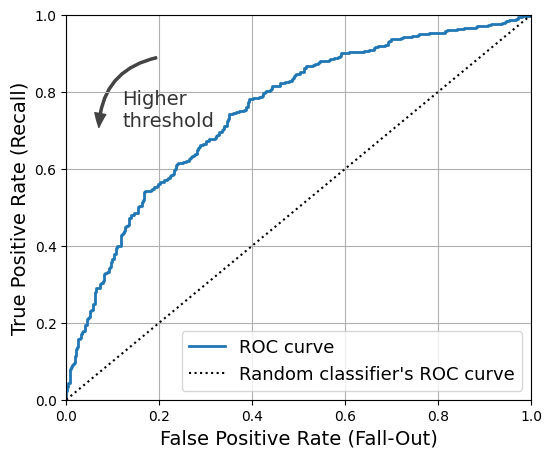

In [72]:
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [73]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_good_50, y_scores)

0.7523054846938775

### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

In [75]:
y_probas_forest = cross_val_predict(forest_clf, X_train_50, y_train_good_50, cv=3,
                                    method="predict_proba")

In [76]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_good_50, y_scores_forest)

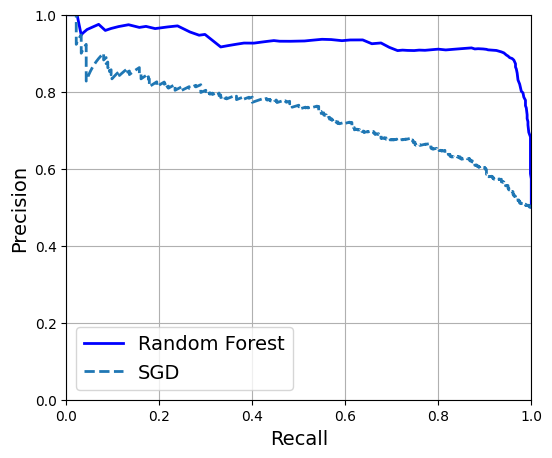

In [77]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [78]:
roc_auc_score(y_train_good_50, y_scores_forest)

0.9501833545918368

In [79]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5

In [80]:
precision_score(y_train_good_50, y_train_pred_forest)

0.9099804305283757

In [81]:
recall_score(y_train_good_50, y_train_pred_forest)

0.8303571428571429

In [82]:
forest_clf.fit(X_train_50, y_train_good_50)
rf_model = forest_clf.named_steps['randomforestclassifier']
importances = rf_model.feature_importances_

In [83]:
feature_names_out = preprocessing.get_feature_names_out()

In [84]:
feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,annual_amount__ratio,0.092795
1,log__amount,0.089470
2,log__age,0.077080
3,log__duration,0.074263
4,cat__status_... >= 200 DM / salary for at leas...,0.059957
5,cat__status_no checking account,0.044049
6,ord__employment_duration,0.038274
7,ord__installment_rate,0.030029
8,ord__present_residence,0.027023
9,cat__savings_unknown/no savings account,0.020871


## Linear Models

### Logistic Regression

In [85]:
X_train = train_set.drop("credit_risk", axis=1)

y_train = train_set["credit_risk"].copy()
y_train_good = (y_train == 'good') 

In [86]:
print(X_train.shape, y_train_good.shape)

(800, 20) (800,)


In [87]:
print(X_train_50.shape, y_train_good_50.shape)

(1120, 20) (1120,)


In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = make_pipeline (preprocessing, LogisticRegression(random_state=42))


#### Accuracy

In [89]:
cross_val_score(log_reg, X_train, y_train_good, cv=3, scoring="accuracy")

array([0.74531835, 0.73782772, 0.76691729])

In [90]:
cross_val_score(log_reg, X_train_50, y_train_good_50, cv=5, scoring="accuracy")

array([0.66071429, 0.77678571, 0.73214286, 0.72321429, 0.79017857])

#### Confusion Matrix

In [91]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train_good, cv=3)
cm = confusion_matrix(y_train_good, y_train_pred)

cm

array([[109, 131],
       [ 69, 491]])

In [92]:
y_train_pred_50 = cross_val_predict(log_reg, X_train_50, y_train_good_50, cv=5)
cm_50 = confusion_matrix(y_train_good_50, y_train_pred_50)

cm_50

array([[428, 132],
       [163, 397]])

#### Precicion and Recall

In [93]:
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

precision_50 = precision_score(y_train_good_50, y_train_pred_50)
recall_50 = recall_score(y_train_good_50, y_train_pred_50)

In [94]:
print(f1_score(y_train_good, y_train_pred), f1_score(y_train_good_50, y_train_pred_50))

0.8307952622673435 0.72910927456382


In [95]:
y_proba = cross_val_predict(log_reg, X_train, y_train_good, cv=3,
                             method="predict_proba")

y_scores = y_proba[:, 1]

In [96]:
precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

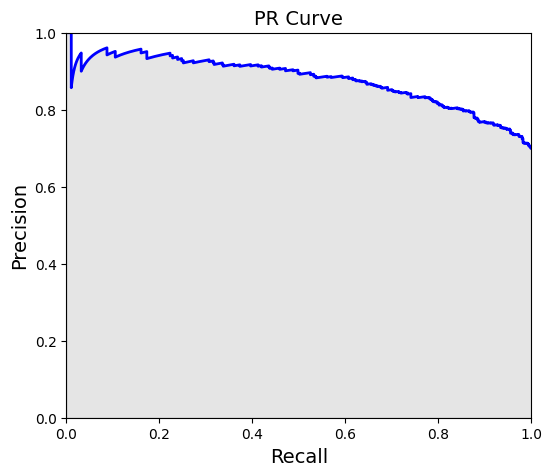

Precision: 0.789, Recall: 0.877


In [97]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.fill_between(recalls, precisions, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()
print(f'Precision: {precision:.3f}, Recall: {recall:.3f}')

In [98]:
y_proba_50 = cross_val_predict(log_reg, X_train_50, y_train_good_50, cv=3,
                             method="predict_proba")

y_scores_50 = y_proba_50[:, 1]

In [99]:
precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

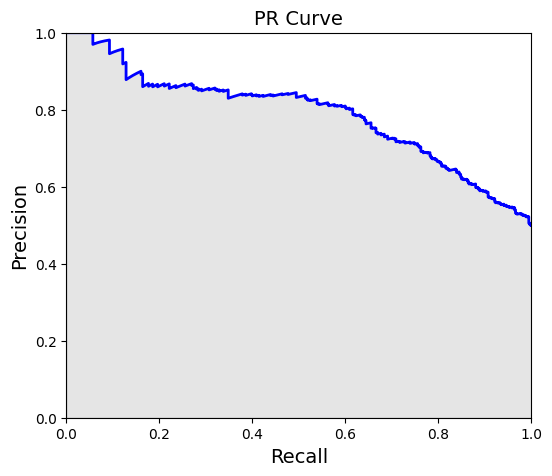

Precision: 0.750, Recall: 0.709


In [100]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls_50, precisions_50, "b-", linewidth=2)
plt.fill_between(recalls_50, precisions_50, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()
print(f'Precision: {precision_50:.3f}, Recall: {recall_50:.3f}')

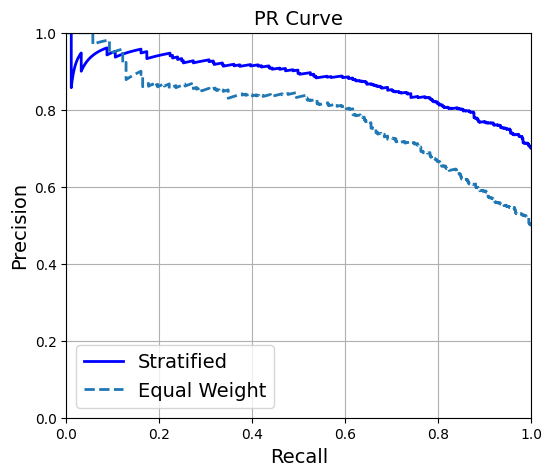

In [101]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.title('PR Curve')
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [102]:
from sklearn.metrics import average_precision_score

pr_auc_log = average_precision_score(y_train_good, y_scores)
pr_auc_log.round(3)

0.878

#### ROC Curve

In [103]:
fpr, tpr, thresholds = roc_curve(y_train_good, y_scores)

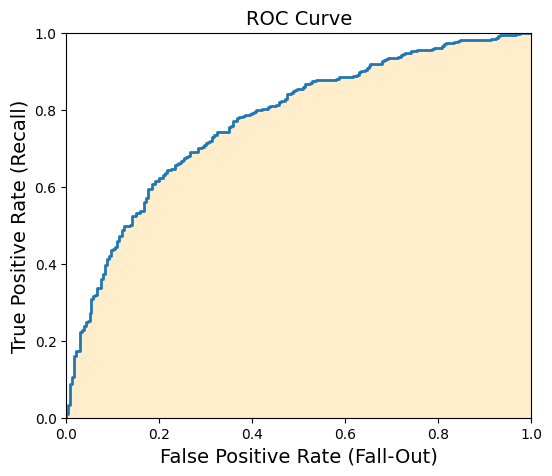

In [104]:
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2)
plt.fill_between(fpr, tpr, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [105]:
from sklearn.metrics import roc_auc_score

roc_log = roc_auc_score(y_train_good, y_scores)

roc_log

0.7729017857142858

In [106]:
y_train_pred = y_proba[:, 1] >= 0.85

In [107]:
precision_score(y_train_good, y_train_pred)

0.9016949152542373

In [108]:
recall_score(y_train_good, y_train_pred)

0.475

In [109]:
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

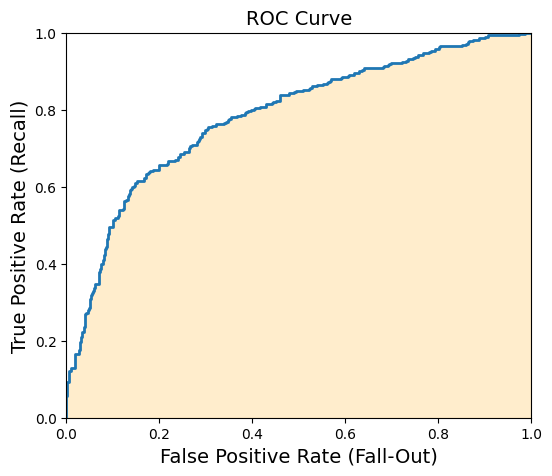

In [110]:
plt.figure(figsize=(6, 5))  
plt.plot(fpr_50, tpr_50, linewidth=2)
plt.fill_between(fpr_50, tpr_50, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [111]:
roc_log_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_log_50

0.7840752551020409

#### Features importance

In [112]:
log_reg.fit(X_train, y_train_good)

log_model = log_reg.named_steps['logisticregression']

importances = log_model.coef_[0] 
feature_names = preprocessing.get_feature_names_out()

In [113]:
feature_importance_log = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_log['Abs_importance'] = feature_importance_log['Importance'].abs()
feature_importance_log = feature_importance_log.sort_values(by='Abs_importance', ascending=False).reset_index(drop=True)

feature_importance_log


,Feature,Importance,Abs_importance
0,log__duration,-1.012108,1.012108
1,cat__status_... >= 200 DM / salary for at leas...,0.777376,0.777376
2,cat__savings_500 <= ... < 1000 DM,0.768469,0.768469
3,cat__credit_history_all credits at this bank p...,0.736222,0.736222
4,cat__purpose_vacation,0.730454,0.730454
5,cat__status_no checking account,-0.725272,0.725272
6,cat__foreign_worker_yes,0.706259,0.706259
7,cat__purpose_car (new),0.703764,0.703764
8,cat__foreign_worker_no,-0.699912,0.699912
9,annual_amount__ratio,-0.689040,0.689040


- High positive coeficients significantly imapcts in the probability of the positive class
- High negative coeficients significantly impacts in the probability of the negative class
- Around 0 coeficients have little to non impact in the predicted probability

    - E.g. Duration has a high negative coeficient, meaning that if duration raises, the probability of beeing a "bad credit" raises and decreases the probability of beeing a "good credit"
    - Salary >= 200 DM has a high positive coeficient, meaning that if a person has a salary over 200 DM, the probability of beeing a "good credit" increases

#### SGD on Logistic Regression

In [114]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_clf = make_pipeline(preprocessing, SGDClassifier(loss='log_loss', penalty='l2', tol=1e-5, n_iter_no_change=100, random_state=42))

param_grid = {
    'sgdclassifier__eta0': [0.0001, 0.001, 0.01, 0.1, 1], # Different learning rates to test
    'sgdclassifier__max_iter': [1000, 2000, 3000], # Different number of iterations
}


grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train_good)

print(f"Best eta0: {grid_search.best_params_['sgdclassifier__eta0']}")
print(f"Best max_iter: {grid_search.best_params_['sgdclassifier__max_iter']}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")

Best eta0: 0.0001
Best max_iter: 1000
Best accuracy: 0.7488


In [115]:
sgd_best_clf = grid_search.best_estimator_

In [116]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_best_clf, X_train, y_train_good, cv=5, scoring='accuracy')

np.mean(scores) ## same as grid_search.best_score_

0.74875

In [117]:
y_proba = cross_val_predict(sgd_best_clf, X_train, y_train_good, cv=5,
                             method="predict_proba")

y_scores = y_proba[:, 1]

roc_log_sgd = roc_auc_score(y_train_good, y_scores)

roc_log_sgd

0.7697693452380951

In [118]:
pr_auc_sgd = average_precision_score(y_train_good, y_scores)
pr_auc_sgd.round(3)

0.877

In [119]:
precision_score(y_train_good, y_scores >= 0.85)

0.8901734104046243

In [120]:
sgd_best_clf.fit(X_train, y_train_good)

sgd_model = sgd_best_clf.named_steps['sgdclassifier']

importances = sgd_model.coef_[0] 
feature_names = preprocessing.get_feature_names_out()

In [121]:
feature_importance_log_sgd = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_log_sgd['Abs_importance'] = feature_importance_log_sgd['Importance'].abs()
feature_importance_log_sgd = feature_importance_log_sgd.sort_values(by='Abs_importance', ascending=False).reset_index(drop=True)

feature_importance_log_sgd

,Feature,Importance,Abs_importance
0,cat__purpose_vacation,1.518879,1.518879
1,log__duration,-1.367427,1.367427
2,cat__foreign_worker_no,-1.337873,1.337873
3,cat__status_no checking account,-0.994015,0.994015
4,cat__savings_unknown/no savings account,-0.907583,0.907583
5,cat__credit_history_critical account/other cre...,-0.906576,0.906576
6,cat__credit_history_delay in paying off in the...,-0.902624,0.902624
7,cat__savings_500 <= ... < 1000 DM,0.885650,0.885650
8,cat__purpose_others,-0.878096,0.878096
9,annual_amount__ratio,-0.865129,0.865129


In [122]:
grid_search.fit(X_train_50, y_train_good_50)

print(f"Best eta0: {grid_search.best_params_['sgdclassifier__eta0']}")
print(f"Best max_iter: {grid_search.best_params_['sgdclassifier__max_iter']}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")

Best eta0: 0.0001
Best max_iter: 1000
Best accuracy: 0.7250


In [123]:
sgd_best_clf_50 = grid_search.best_estimator_

In [124]:
y_proba_50 = cross_val_predict(sgd_best_clf_50, X_train_50, y_train_good_50, cv=5,
                             method="predict_proba")

y_scores_50 = y_proba_50[:, 1]
roc_log_sgd_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_log_sgd_50

0.7891900510204082

## Support Vector Machines

### Linear SVM Classification

In [125]:
from sklearn.svm import SVC

svm_clf = make_pipeline(preprocessing,
                        SVC(kernel='linear', random_state=42))

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'svc__C': randint(low=0, high=100) 
}

random_search = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train_good)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                                                                                                                            '5-Apr',
                                                                                                                            '>= '
                                                                                                                            '6']]))]),
                                                                               ['employment_duration',
                                                                                'installment_rate',
                                                                                'present_residence',
                                                                                'number_credits']),
                                                                              ('drop_personal_status_sex',
                                                                               'drop',
                                                                               ['personal_status_sex'])])),
                                             ('svc',
                                              SVC(kernel='linear',
                                                  random_state=42))]),
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x119e7ec00>},
                   random_state=42, scoring='accuracy')

In [127]:
svm_clf = random_search.best_estimator_

In [128]:
print(f'Accuracy: {random_search.best_score_:.4f}')

Accuracy: 0.7475


In [129]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train_good, cv=3)

In [130]:
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Precision: {precision:.3f}, Recall: {recall:.3f}')

Precision: 0.795, Recall: 0.850


In [131]:
y_scores = cross_val_predict(svm_clf, X_train, y_train_good, cv=3,
                             method="decision_function")

In [132]:
precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

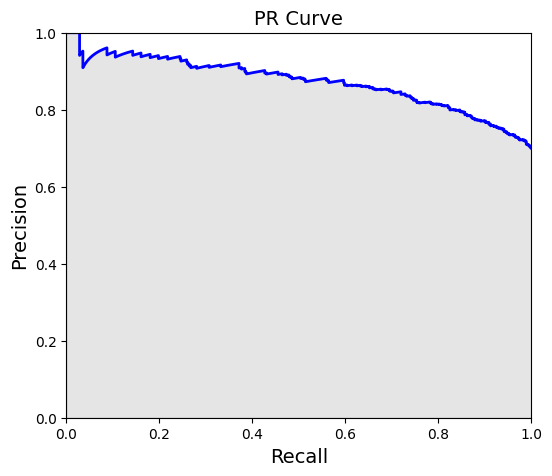

In [133]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.fill_between(recalls, precisions, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [134]:
idx_for_85_precision = (precisions >= 0.85).argmax()
threshold_for_85_precision = thresholds[idx_for_85_precision]
threshold_for_85_precision.round(3)

0.752

In [135]:
y_train_pred_85 = (y_scores >= threshold_for_85_precision)

In [136]:
precision_85 = precision_score(y_train_good, y_train_pred_85)
recall_85 = recall_score(y_train_good, y_train_pred_85)

print(f'Precision: {precision_85:.3f}, Recall: {recall_85:.3f}')

Precision: 0.851, Recall: 0.695


In [137]:
y_train_pred_50 = cross_val_predict(svm_clf, X_train_50, y_train_good_50, cv=3)

In [138]:
precision_50 = precision_score(y_train_good_50, y_train_pred_50)
recall_50 = recall_score(y_train_good_50, y_train_pred_50)

print(f'Precision: {precision_50:.3f}, Recall: {recall_50:.3f}')

Precision: 0.737, Recall: 0.707


In [139]:
y_scores_50 = cross_val_predict(svm_clf, X_train_50, y_train_good_50, cv=3,
                             method="decision_function")

In [140]:
precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

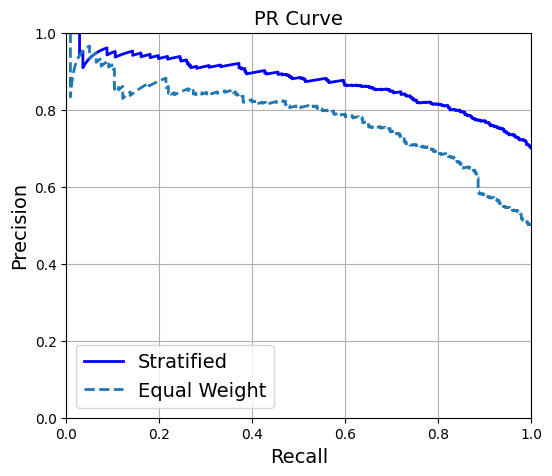

In [141]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")

plt.show()

In [142]:
pr_auc_svm = average_precision_score(y_train_good, y_scores)
pr_auc_svm.round(3)

0.873

In [143]:
roc_svm = roc_auc_score(y_train_good, y_scores)
roc_svm_50 = roc_auc_score(y_train_good_50, y_scores_50)

print(f'roc_auc: {roc_svm:.3f}, roc_auc_50: {roc_svm_50:.3f}')

roc_auc: 0.761, roc_auc_50: 0.786


#### Feature importance

In [144]:
linear_svc = svm_clf.named_steps['svc']


importances = linear_svc.coef_[0] 
feature_names = preprocessing.get_feature_names_out()

In [145]:
feature_importance_linear_svc = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_linear_svc['Abs_importance'] = feature_importance_linear_svc['Importance'].abs()
feature_importance_linear_svc = feature_importance_linear_svc.sort_values(by='Abs_importance', ascending=False).reset_index(drop=True)

feature_importance_linear_svc

,Feature,Importance,Abs_importance
0,cat__purpose_vacation,1.106816,1.106816
1,log__duration,-0.931085,0.931085
2,cat__other_debtors_guarantor,0.751423,0.751423
3,cat__status_no checking account,-0.735843,0.735843
4,cat__credit_history_all credits at this bank p...,0.729680,0.729680
5,annual_amount__ratio,-0.727741,0.727741
6,log__amount,0.696885,0.696885
7,cat__purpose_radio/television,-0.663308,0.663308
8,cat__job_unemployed/unskilled - non-resident,0.649975,0.649975
9,cat__credit_history_critical account/other cre...,-0.620832,0.620832


### Non Linear SVM Classification

#### Polynomial Kernel

In [146]:
poly_kernel_svm_clf = make_pipeline(preprocessing,
                                    SVC(kernel="poly"))

param_distributions = {
    'svc__degree': [2, 3, 5, 10, 15], 
    'svc__coef0': randint(low=0, high=150), 
    'svc__C': randint(low=0, high=15) 
}

random_search = RandomizedSearchCV(poly_kernel_svm_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train_good)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                                                                                'number_credits']),
                                                                              ('drop_personal_status_sex',
                                                                               'drop',
                                                                               ['personal_status_sex'])])),
                                             ('svc', SVC(kernel='poly'))]),
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x119954890>,
                                        'svc__coef0': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x119f1ec00>,
                                        'svc__degree': [2, 3, 5, 10, 15]},
                   random_state=42, scoring='accuracy')

In [147]:
poly_svm_clf = random_search.best_estimator_

In [148]:
print(f'Accuracy: {random_search.best_score_:.4f}')

Accuracy: 0.7400


In [149]:
y_train_pred = cross_val_predict(poly_svm_clf, X_train, y_train_good, cv=3)

precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Precision: {precision:.3f}, Recall: {recall:.3f}')

Precision: 0.792, Recall: 0.821


In [150]:
y_scores = cross_val_predict(poly_svm_clf, X_train, y_train_good, cv=3,
                             method="decision_function")

In [151]:
roc_poly_svm = roc_auc_score(y_train_good, y_scores)

roc_poly_svm.round(3)

0.739

In [152]:
precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)
threshold_for_90_precision = thresholds[(precisions >= 0.90).argmax()]

y_train_pred_90 = y_scores >= threshold_for_90_precision

print(f"Precision: {precision_score(y_train_good, y_train_pred_90):.3f}, Recall: {recall_score(y_train_good, y_train_pred_90):.3f}")

Precision: 0.902, Recall: 0.377


In [153]:
y_scores_50 = cross_val_predict(poly_svm_clf, X_train_50, y_train_good_50, cv=3,
                             method="decision_function")

precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

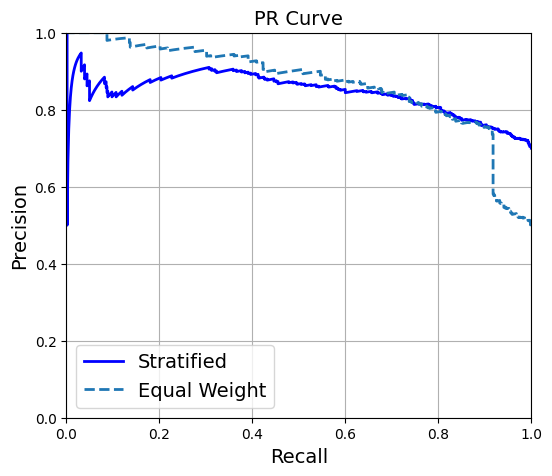

In [154]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")


In [155]:
pr_auc_pol = average_precision_score(y_train_good, y_scores)
pr_auc_pol.round(3)

0.845

In [156]:
threshold_for_90_precision_50 = thresholds_50[(precisions_50 >= 0.90).argmax()]

y_train_pred_90_50 = y_scores_50 >= threshold_for_90_precision_50

print(f"Recall: {recall_score(y_train_good_50, y_train_pred_90_50):.3f}; Precision: {precision_score(y_train_good_50, y_train_pred_90_50):.3f}")

Recall: 0.546; Precision: 0.900


#### Gaussian RBF Kernel

In [157]:
rbf_kernel_svm_clf = make_pipeline(preprocessing,
                                   SVC(kernel="rbf"))

param_distributions = {
    'svc__gamma': randint(low=0, high=10), 
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

random_search = RandomizedSearchCV(rbf_kernel_svm_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train_good)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                                                                               ['employment_duration',
                                                                                'installment_rate',
                                                                                'present_residence',
                                                                                'number_credits']),
                                                                              ('drop_personal_status_sex',
                                                                               'drop',
                                                                               ['personal_status_sex'])])),
                                             ('svc', SVC())]),
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000, 10000],
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1198d7f50>},
                   random_state=42, scoring='accuracy')

In [158]:
rbf_svm_clf = random_search.best_estimator_

In [159]:
print(f'Accuracy: {random_search.best_score_:.4f}')

Accuracy: 0.7025


In [160]:
y_train_pred = cross_val_predict(rbf_svm_clf, X_train, y_train_good, cv=3)

precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Precision: {precision:.3f}, Recall: {recall:.3f}')

Precision: 0.700, Recall: 1.000


In [161]:
y_scores = cross_val_predict(rbf_svm_clf, X_train, y_train_good, cv=3,
                             method="decision_function")

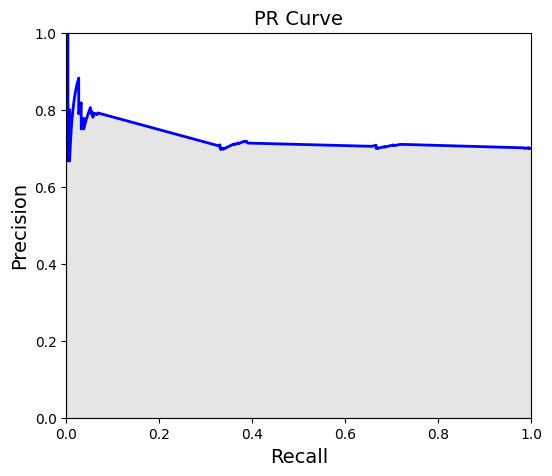

In [162]:
precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.fill_between(recalls, precisions, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [163]:
roc_rbf_svm = roc_auc_score(y_train_good, y_scores)

roc_rbf_svm.round(3)

0.518

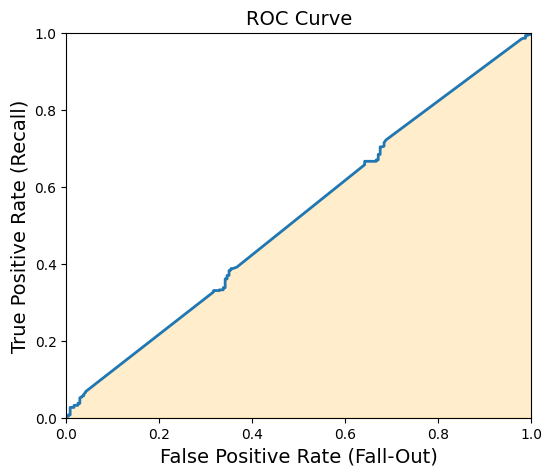

In [164]:
fpr, tpr, thresholds = roc_curve(y_train_good, y_scores)

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2)
plt.fill_between(fpr, tpr, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [165]:
y_scores_50 = cross_val_predict(rbf_svm_clf, X_train_50, y_train_good_50, cv=3,
                             method="decision_function")

In [166]:
y_train_pred_50 = cross_val_predict(rbf_svm_clf, X_train_50, y_train_good_50, cv=3)

precision_50 = precision_score(y_train_good_50, y_train_pred_50)
recall_50 = recall_score(y_train_good_50, y_train_pred_50)

print(f'Precision: {precision_50:.3f}, Recall: {recall_50:.3f}')

Precision: 0.845, Recall: 1.000


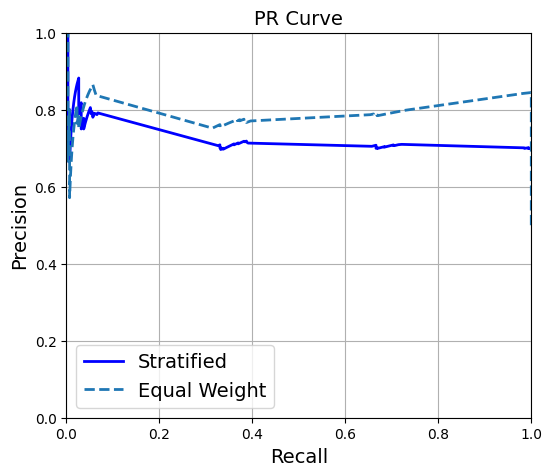

In [167]:
precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")


In [168]:
pr_auc_rbf = average_precision_score(y_train_good, y_scores)
pr_auc_rbf.round(3)

0.712

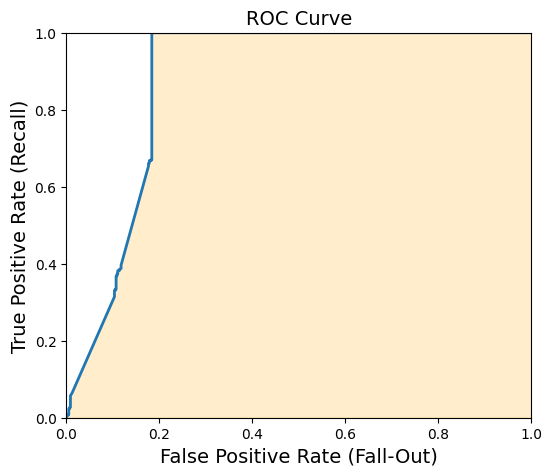

In [169]:
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_50, tpr_50, linewidth=2)
plt.fill_between(fpr_50, tpr_50, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [170]:
roc_rbf_svm_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_rbf_svm_50.round(3)

0.875

## Decision Trees

In [171]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))

In [172]:
param_dist = {
    'decisiontreeclassifier__min_samples_split': randint(2, 20),       
    'decisiontreeclassifier__min_samples_leaf': randint(1, 20),        
    'decisiontreeclassifier__max_features': ['sqrt', 'log2'],          
}

random_search = RandomizedSearchCV(tree_clf, param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train_good)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                   n_iter=100,
                   param_distributions={'decisiontreeclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'decisiontreeclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x119902a20>,
                                        'decisiontreeclassifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11982f080>},
                   random_state=42, scoring='accuracy')

In [173]:
tree_clf = random_search.best_estimator_

In [174]:
print(f'Accuracy: {random_search.best_score_:.4f}')

Accuracy: 0.7200


In [175]:
y_train_pred = cross_val_predict(tree_clf, X_train, y_train_good, cv=3)

precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Precision: {precision:.3f}, Recall: {recall:.3f}')

Precision: 0.769, Recall: 0.843


In [176]:
y_probas = cross_val_predict(tree_clf, X_train, y_train_good, cv=3,
                                    method="predict_proba")

y_scores = y_probas[:, 1]

In [177]:
roc_tree = roc_auc_score(y_train_good, y_scores)

roc_tree.round(3)

0.702

In [178]:
precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)
threshold_for_90_precision = thresholds[(precisions >= 0.90).argmax()]

y_train_pred_90 = y_scores >= threshold_for_90_precision

print(f"Precision: {precision_score(y_train_good, y_train_pred_90):.3f}, Recall: {recall_score(y_train_good, y_train_pred_90):.3f}")

Precision: 0.906, Recall: 0.293


In [179]:
y_probas_50 = cross_val_predict(tree_clf, X_train_50, y_train_good_50, cv=3,
                                    method="predict_proba")

y_scores_50 = y_probas_50[:, 1]

precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

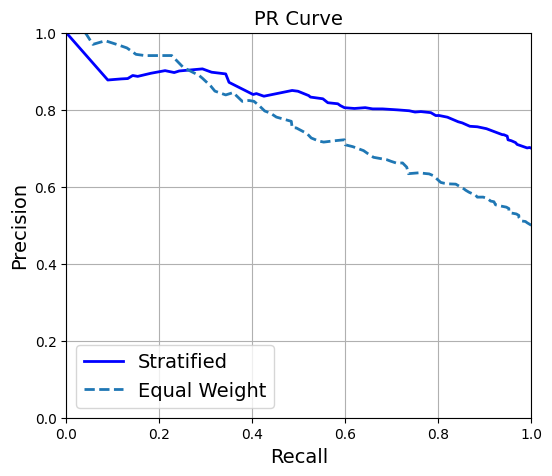

In [180]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")

In [181]:
pr_auc_tree = average_precision_score(y_train_good, y_scores)
pr_auc_tree.round(3)

0.829

In [182]:
roc_tree_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_tree_50.round(3)

0.744

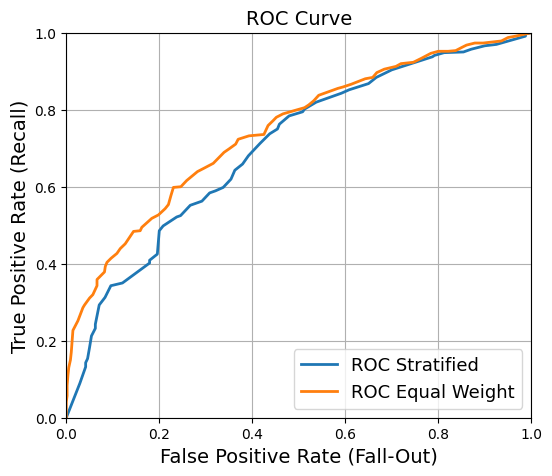

In [183]:
fpr, tpr, thresholds = roc_curve(y_train_good, y_scores)
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC Stratified")
plt.plot(fpr_50, tpr_50, linewidth=2, label="ROC Equal Weight")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.title('ROC Curve')
plt.legend(loc="lower right", fontsize=13)

plt.show()

### Feature Importance

In [184]:
tree_clf.fit(X_train, y_train_good)
tree_model = tree_clf.named_steps['decisiontreeclassifier']
importances = tree_model.feature_importances_

feature_names_out = preprocessing.get_feature_names_out()

In [185]:
feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,cat__status_... >= 200 DM / salary for at leas...,0.355572
1,annual_amount__ratio,0.167758
2,log__duration,0.107486
3,cat__credit_history_all credits at this bank p...,0.088025
4,cat__savings_unknown/no savings account,0.087594
5,cat__status_no checking account,0.075257
6,log__amount,0.036572
7,cat__status_... < 0 DM,0.023992
8,cat__job_skilled employee/official,0.021268
9,ord__present_residence,0.016473


## Random Forest

In [186]:
rnd_clf = make_pipeline(preprocessing, RandomForestClassifier(max_depth=17, min_samples_split=8, n_estimators=108, n_jobs=-1, random_state=42))

In [187]:
from sklearn.metrics import accuracy_score
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train_good, cv=3)

accuracy = accuracy_score(y_train_good, y_train_pred)
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Accuracy {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')

Accuracy 0.757, Precision: 0.768, Recall: 0.938


In [188]:
y_probas = cross_val_predict(rnd_clf, X_train, y_train_good, cv=3,
                                    method="predict_proba")

y_scores = y_probas[:, 1]

In [189]:
roc_rnd = roc_auc_score(y_train_good, y_scores)

roc_rnd.round(3)

0.786

In [190]:
precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)
threshold_for_90_precision = thresholds[(precisions >= 0.90).argmax()]

y_train_pred_90 = y_scores >= threshold_for_90_precision

print(f"Precision: {precision_score(y_train_good, y_train_pred_90):.3f}, Recall: {recall_score(y_train_good, y_train_pred_90):.3f}")

Precision: 0.900, Recall: 0.498


In [191]:
y_probas_50 = cross_val_predict(rnd_clf, X_train_50, y_train_good_50, cv=3,
                                    method="predict_proba")

y_scores_50 = y_probas_50[:, 1]

precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

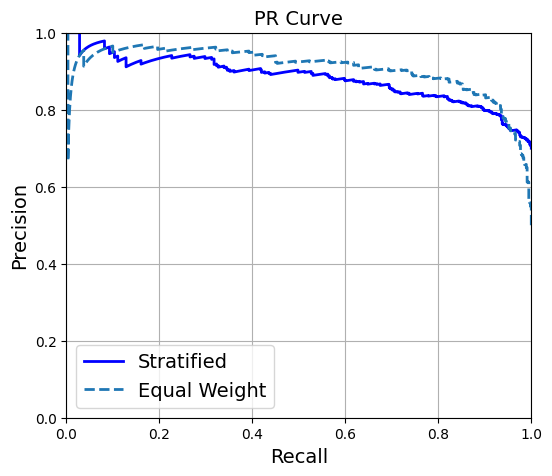

In [192]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")

In [193]:
pr_auc_rnd = average_precision_score(y_train_good, y_scores)

pr_auc_rnd.round(3)

0.883

In [194]:
roc_rnd_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_rnd_50.round(3)

0.926

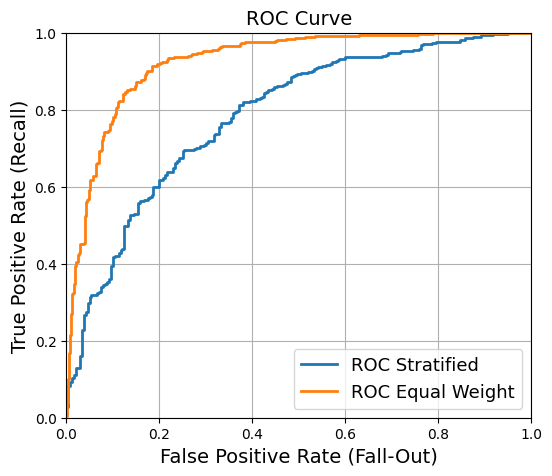

In [195]:
fpr, tpr, thresholds = roc_curve(y_train_good, y_scores)
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC Stratified")
plt.plot(fpr_50, tpr_50, linewidth=2, label="ROC Equal Weight")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.title('ROC Curve')
plt.legend(loc="lower right", fontsize=13)

plt.show()

### Feature Importance

In [196]:
rnd_clf.fit(X_train, y_train_good)
rnd_model = rnd_clf.named_steps['randomforestclassifier']
importances = rnd_model.feature_importances_

feature_names_out = preprocessing.get_feature_names_out()

In [197]:
feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,annual_amount__ratio,0.109045
1,log__amount,0.100184
2,log__duration,0.079244
3,log__age,0.071393
4,cat__status_no checking account,0.059576
5,cat__status_... >= 200 DM / salary for at leas...,0.057585
6,ord__employment_duration,0.034934
7,ord__installment_rate,0.027578
8,ord__present_residence,0.024894
9,cat__savings_unknown/no savings account,0.022825


### Extra Trees

In [198]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = make_pipeline(preprocessing, ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42))

In [199]:
ext_ac = cross_val_score(ext_clf, X_train, y_train,
                              scoring="accuracy", cv=3, n_jobs=-1)

rnd_acc = cross_val_score(rnd_clf, X_train, y_train, scoring="accuracy", cv=3, n_jobs=-1)

In [200]:
rnd_acc.mean().round(3), ext_ac.mean().round(3)

(0.758, 0.726)

## AdaBoost

In [201]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = make_pipeline(preprocessing, AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42))


In [202]:
y_train_pred = cross_val_predict(ada_clf, X_train, y_train_good, cv=3)

accuracy = accuracy_score(y_train_good, y_train_pred)
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Accuracy {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')

Accuracy 0.724, Precision: 0.742, Recall: 0.929


In [203]:
y_probas = cross_val_predict(ada_clf, X_train, y_train_good, cv=3,
                                    method="predict_proba")

y_scores = y_probas[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

In [204]:
roc_ada = roc_auc_score(y_train_good, y_scores)

roc_ada.round(3)

0.726

In [205]:
y_probas_50 = cross_val_predict(ada_clf, X_train_50, y_train_good_50, cv=3,
                                    method="predict_proba")

y_scores_50 = y_probas_50[:, 1]

precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

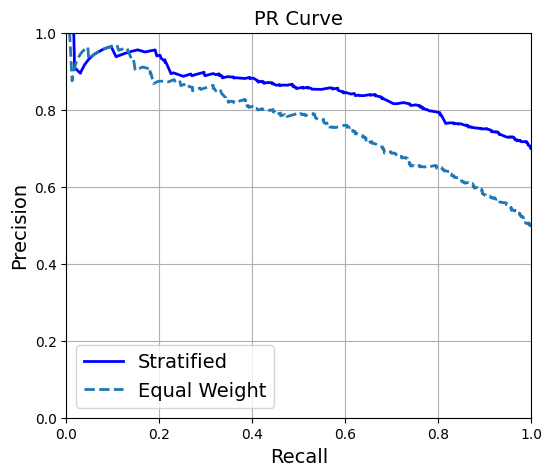

In [206]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")

In [207]:
pr_auc_ada = average_precision_score(y_train_good, y_scores)

pr_auc_ada.round(3)

0.853

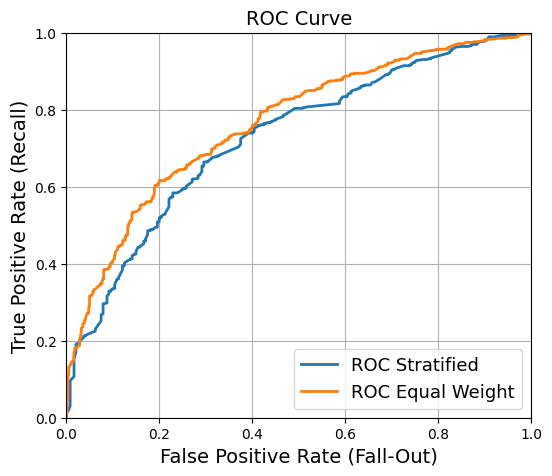

In [208]:
fpr, tpr, thresholds = roc_curve(y_train_good, y_scores)
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC Stratified")
plt.plot(fpr_50, tpr_50, linewidth=2, label="ROC Equal Weight")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [209]:
roc_ada_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_ada_50.round(3)

0.763

### Feature Importances

In [210]:
ada_clf.fit(X_train, y_train_good)
ada_model = ada_clf.named_steps['adaboostclassifier']
importances = ada_model.feature_importances_

feature_names_out = preprocessing.get_feature_names_out()

In [211]:
feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,cat__status_... >= 200 DM / salary for at leas...,0.312177
1,log__duration,0.191328
2,log__amount,0.107663
3,cat__status_no checking account,0.103470
4,cat__foreign_worker_yes,0.079888
5,annual_amount__ratio,0.049892
6,cat__savings_unknown/no savings account,0.043404
7,cat__purpose_car (new),0.040703
8,cat__foreign_worker_no,0.039673
9,cat__credit_history_all credits at this bank p...,0.031803


## XGBoost

XGBoost is a boosting algorithm so it creates sequential models. Each new model tries to improve the precedent.

In [212]:
from collections import Counter

counter = Counter(y_train_good)
scale_pos_weight = counter[True] / counter[False] # Penalize the model for misclassifying the minority class

In [213]:
from xgboost import XGBClassifier

xgb_clf = make_pipeline(preprocessing, XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42))


param_dist = {
    'xgbclassifier__n_estimators': [100, 300, 500, 800],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__min_child_weight': [1, 3, 5, 10],
    'xgbclassifier__gamma': [0, 0.1, 0.3, 0.5],
    'xgbclassifier__subsample': [0.5, 0.7, 1],
    'xgbclassifier__colsample_bytree': [0.5, 0.7, 1]
}

xgb_random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist,
                                   n_iter=20, scoring='average_precision', cv=3, n_jobs=-1)

xgb_random_search.fit(X_train, y_train_good)

print("Best PR AUC:", xgb_random_search.best_score_)


Best PR AUC: 0.8900939398301303


In [214]:
xgb_clf = xgb_random_search.best_estimator_

In [215]:
y_train_pred = cross_val_predict(xgb_clf, X_train, y_train_good, cv=3)

accuracy = accuracy_score(y_train_good, y_train_pred)
precision = precision_score(y_train_good, y_train_pred)
recall = recall_score(y_train_good, y_train_pred)

print(f'Accuracy {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}')

Accuracy 0.723, Precision: 0.723, Recall: 0.979


In [216]:
y_probas = cross_val_predict(xgb_clf, X_train, y_train_good, cv=3,
                                    method="predict_proba")

y_scores = y_probas[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

In [217]:
y_probas_50 = cross_val_predict(xgb_clf, X_train_50, y_train_good_50, cv=3,
                                    method="predict_proba")

y_scores_50 = y_probas_50[:, 1]

precisions_50, recalls_50, thresholds_50 = precision_recall_curve(y_train_good_50, y_scores_50)

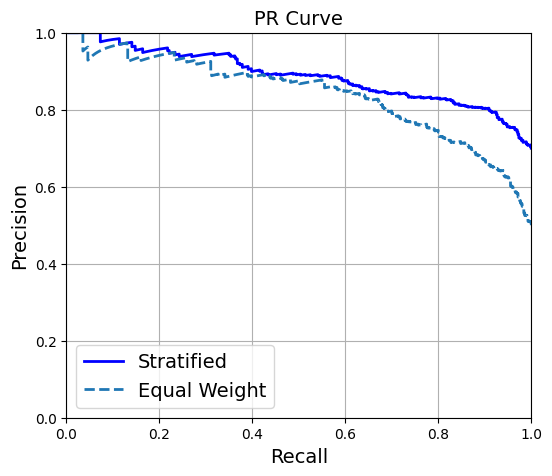

In [218]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Stratified")
plt.plot(recalls_50, precisions_50, "--", linewidth=2, label="Equal Weight")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.title('PR Curve')
plt.legend(loc="lower left")

In [219]:
pr_auc_xgb = average_precision_score(y_train_good, y_scores)

pr_auc_xgb.round(3)

0.888

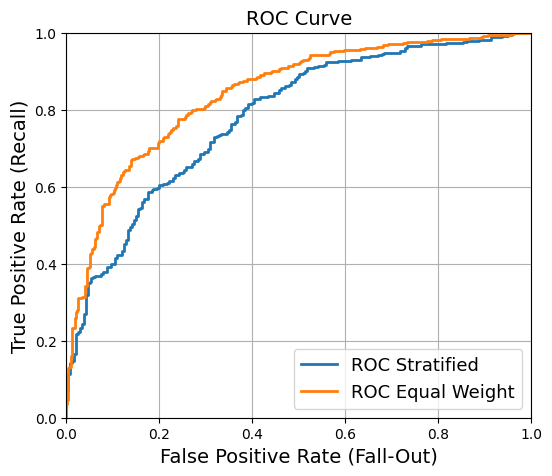

In [220]:
fpr, tpr, thresholds = roc_curve(y_train_good, y_scores)
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label="ROC Stratified")
plt.plot(fpr_50, tpr_50, linewidth=2, label="ROC Equal Weight")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [221]:
roc_xgb_50 = roc_auc_score(y_train_good_50, y_scores_50)

roc_xgb_50.round(3)

0.843

### Feature Importances

In [222]:
xgb_clf.fit(X_train, y_train_good)
xgb_model = xgb_clf.named_steps['xgbclassifier']
importances = xgb_model.feature_importances_

feature_names_out = preprocessing.get_feature_names_out()

In [223]:
feature_importance = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,cat__status_... >= 200 DM / salary for at leas...,0.091169
1,cat__status_no checking account,0.064570
2,cat__status_... < 0 DM,0.036785
3,cat__credit_history_all credits at this bank p...,0.032876
4,cat__savings_unknown/no savings account,0.031509
5,annual_amount__ratio,0.029484
6,cat__property_car or other,0.028822
7,cat__savings_... >= 1000 DM,0.028787
8,log__amount,0.028380
9,log__duration,0.027885


## Model Selection

In [224]:
pr_auc_dict = {
    'logistic clf': pr_auc_log,
    'sgd_logistic clf':pr_auc_sgd,
    'svm_lineaer clf':pr_auc_svm,
    'svm_pol clf':pr_auc_pol,
    'svm_rbf clf':pr_auc_rbf,
    'decision_tree clf':pr_auc_tree,
    'random_forest clf':pr_auc_rnd,
    'ada_boost clf':pr_auc_ada,
    'xgboost clf':pr_auc_xgb
}

In [225]:
pr_auc = pd.DataFrame(list(pr_auc_dict.items()), columns=['Model', 'PR AUC'])
pr_auc['PR AUC'] = pr_auc['PR AUC'].round(3)
pr_auc = pr_auc.sort_values(by='PR AUC', ascending=False).reset_index(drop=True)

pr_auc


,Model,PR AUC
0,xgboost clf,0.888
1,random_forest clf,0.883
2,logistic clf,0.878
3,sgd_logistic clf,0.877
4,svm_lineaer clf,0.873
5,ada_boost clf,0.853
6,svm_pol clf,0.845
7,decision_tree clf,0.829
8,svm_rbf clf,0.712


In [226]:
roc_auc_dict = {
    'logistic clf': roc_log_50,
    'sgd_logistic clf': roc_log_sgd_50,
    'svm_lineaer clf': roc_svm_50,
    'svm_pol clf': roc_poly_svm,
    'svm_rbf clf': roc_rbf_svm,
    'decision_tree clf': roc_tree_50,
    'random_forest clf': roc_rnd_50,
    'ada_boost clf': roc_ada_50,
    'xgboost clf': roc_xgb_50
}

In [227]:
roc_auc = pd.DataFrame(list(roc_auc_dict.items()), columns=['Model', 'ROC AUC'])
roc_auc['ROC AUC'] = roc_auc['ROC AUC'].round(3)
roc_auc = roc_auc.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)

roc_auc

,Model,ROC AUC
0,random_forest clf,0.926
1,xgboost clf,0.843
2,sgd_logistic clf,0.789
3,svm_lineaer clf,0.786
4,logistic clf,0.784
5,ada_boost clf,0.763
6,decision_tree clf,0.744
7,svm_pol clf,0.739
8,svm_rbf clf,0.518


## Hyperparameter Tuning

### Stratified Set

#### XGBoost Classifier

In [228]:
xgb_random_search.best_params_

{'xgbclassifier__subsample': 1,
 'xgbclassifier__n_estimators': 500,
 'xgbclassifier__min_child_weight': 3,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__learning_rate': 0.01,
 'xgbclassifier__gamma': 0,
 'xgbclassifier__colsample_bytree': 0.7}

In [229]:
'''xgb_clf = make_pipeline(preprocessing, XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42))

param_grid = {
    'xgbclassifier__n_estimators': [450, 500, 550],  
    'xgbclassifier__learning_rate': [0.005, 0.01, 0.02],  
    'xgbclassifier__max_depth': [2, 3, 4],  
    'xgbclassifier__min_child_weight': [2, 3, 4],  
    'xgbclassifier__gamma': [0.4, 0.5, 0.6],  
    'xgbclassifier__subsample': [0.9, 1],  
    'xgbclassifier__colsample_bytree': [0.4, 0.5, 0.6]  
}

grid_search = GridSearchCV(xgb_clf,
                           param_grid, scoring='average_precision', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train_good)'''


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('annual_amount',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                              func=<function column_ratio at 0x11a0e8e00>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['amount',
                                                                          'duration'...
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.4, 0.5, 0.6],
                         'xgbclassifier__gamma': [0.4, 0.5, 0.6],
                         'xgbclassifier__learning_rate': [0.005, 0.01, 0.02],
                         'xgbclassifier__max_depth': [2, 3, 4],
                         'xgbclassifier__min_child_weight': [2, 3, 4],
                         'xgbclassifier__n_estimators': [450, 500, 550],
                         'xgbclassifier__subsample': [0.9, 1]},
             scoring='average_precision')

In [276]:
#print("Best PR AUC:", round(grid_search.best_score_, 3))
#print("Best params:", grid_search.best_params_)

Best PR AUC: 0.893
Best params: {'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 0.6, 'xgbclassifier__learning_rate': 0.02, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__n_estimators': 450, 'xgbclassifier__subsample': 1}


In [287]:
xgb_clf = make_pipeline(preprocessing, XGBClassifier(scale_pos_weight=scale_pos_weight, colsample_bytree=0.6,
                                                      gamma=0.6, learning_rate=0.02, max_depth=4, min_child_weight=2, n_estimators=450, subsample=1, 
                                                      random_state=42))

xgb_clf.fit(X_train, y_train_good)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('annual_amount',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                       func=<function column_ratio at 0x11a0e8e00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'duration']),
                                                 ('log',
                                                  Pipeline(steps=[('...
                               feature_types=None, gamma=0.6, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=2,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=450,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [232]:
y_probas = cross_val_predict(xgb_clf, X_train, y_train_good, cv=5,
                                    method="predict_proba")
y_scores = y_probas[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

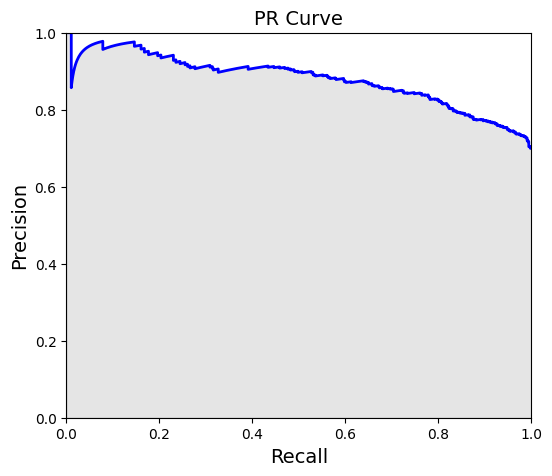

In [278]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.fill_between(recalls, precisions, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])
plt.show()

#### Random Forest Classifier

In [234]:
rnd_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

param_dist = {
    'randomforestclassifier__n_estimators': np.arange(100, 1000, 100), # nº of trees
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 50], # how deep a tree can grow
    'randomforestclassifier__min_samples_split': [2, 5, 10], # min samples required to split a node
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # min samples required at each leaf node
    'randomforestclassifier__max_features': ['sqrt', 'log2'],  # max number of features considered for splitting a node
}


random_search = RandomizedSearchCV(
    rnd_clf, param_distributions=param_dist, 
    n_iter=10,  
    scoring='average_precision',  
    cv=3,  
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train, y_train_good)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              30,
                                                                              50],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, scoring='average_precision')

In [235]:
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best PR AUC: {random_search.best_score_:.3f}")

Best hyperparameters: {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 50}
Best PR AUC: 0.893


In [236]:
'''import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('randomforestclassifier__n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('randomforestclassifier__max_depth', 10, 50)
    min_samples_split = trial.suggest_int('randomforestclassifier__min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('randomforestclassifier__min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('randomforestclassifier__max_features', ['sqrt', 'log2'])


    clf = make_pipeline(preprocessing, RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    ))

   
    score = cross_val_score(clf, X_train, y_train_good, cv=3, scoring='average_precision', n_jobs=-1)
    return score.mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  '''


"import optuna\nfrom sklearn.model_selection import cross_val_score\n\ndef objective(trial):\n    n_estimators = trial.suggest_int('randomforestclassifier__n_estimators', 100, 1000, step=100)\n    max_depth = trial.suggest_int('randomforestclassifier__max_depth', 10, 50)\n    min_samples_split = trial.suggest_int('randomforestclassifier__min_samples_split', 2, 10)\n    min_samples_leaf = trial.suggest_int('randomforestclassifier__min_samples_leaf', 1, 4)\n    max_features = trial.suggest_categorical('randomforestclassifier__max_features', ['sqrt', 'log2'])\n\n\n    clf = make_pipeline(preprocessing, RandomForestClassifier(\n        n_estimators=n_estimators, \n        max_depth=max_depth,\n        min_samples_split=min_samples_split,\n        min_samples_leaf=min_samples_leaf,\n        max_features=max_features,\n        random_state=42\n    ))\n\n   \n    score = cross_val_score(clf, X_train, y_train_good, cv=3, scoring='average_precision', n_jobs=-1)\n    return score.mean()\n\n\nstu

In [237]:
# print(f"Best Hyperparameters: {study.best_params}")
# print(f"Best PR AUC: {study.best_value:.3f}")

In [238]:
rnd_clf = random_search.best_estimator_

In [239]:
y_probas = cross_val_predict(rnd_clf, X_train, y_train_good, cv=5,
                                    method="predict_proba")
y_scores = y_probas[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

(0.0, 1.0, 0.0, 1.0)

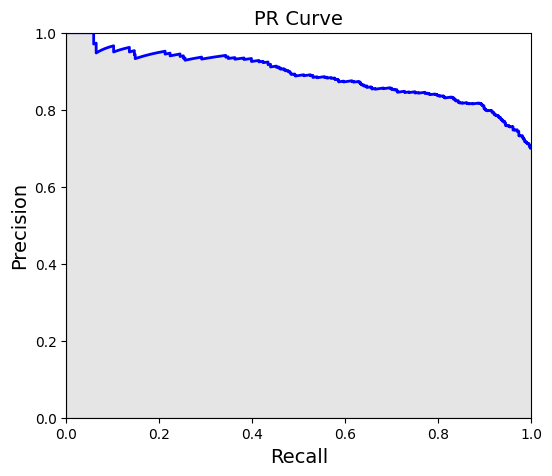

In [240]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.fill_between(recalls, precisions, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

#### Logistic Classifier

In [241]:
log_clf = make_pipeline (preprocessing, LogisticRegression(random_state=42))

param_dist = {
    'logisticregression__C': np.logspace(-4, 4, 20),  
    'logisticregression__penalty': ['l1', 'l2'],  
    'logisticregression__solver': ['liblinear', 'saga'], 
    'logisticregression__max_iter': [500, 1000, 2000], 
}

random_search_logistic = RandomizedSearchCV(
    log_clf, 
    param_distributions=param_dist,
    n_iter=10,  
    scoring='average_precision',  
    cv=3,  
    n_jobs=-1, 
    random_state=42
)

random_search_logistic.fit(X_train, y_train_good)

/Users/gonzalocaro/Desktop/Empresas - Trabajos/IUMA/Python/Practicas-ML-NN/PracticasIUMA/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gonzalocaro/Desktop/Empresas - Trabajos/IUMA/Python/Practicas-ML-NN/PracticasIUMA/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gonzalocaro/Desktop/Empresas - Trabajos/IUMA/Python/Practicas-ML-NN/PracticasIUMA/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'logisticregression__max_iter': [500,
                                                                         1000,
                                                                         2000],
                                        'logisticregression__penalty': ['l1',
                                                                        'l2'],
                                        'logisticregression__solver': ['liblinear',
                                                                       'saga']},
                   random_state=42, scoring='average_precision')

In [242]:
print(f"Best hyperparameters: {random_search_logistic.best_params_}")
print(f"Best PR AUC: {random_search_logistic.best_score_:.3f}")

Best hyperparameters: {'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 500, 'logisticregression__C': 0.08858667904100823}
Best PR AUC: 0.882


In [243]:
log_clf = random_search_logistic.best_estimator_

In [244]:
y_proba = cross_val_predict(log_clf, X_train, y_train_good, cv=5,
                             method="predict_proba")
y_scores = y_proba[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train_good, y_scores)

(0.0, 1.0, 0.0, 1.0)

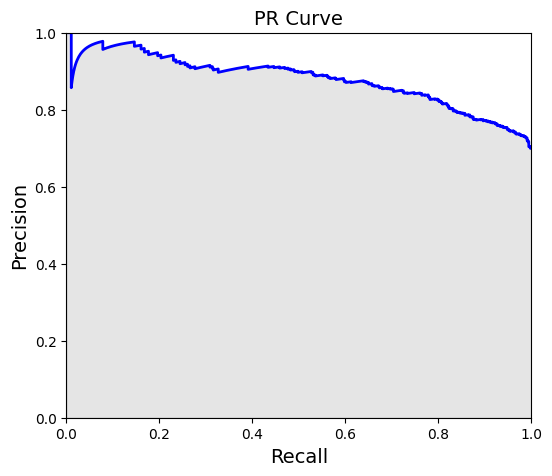

In [245]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.fill_between(recalls, precisions, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

### Equal Weight Set

#### Random Forest Classifier

In [246]:
param_dist = {
    'randomforestclassifier__n_estimators': np.arange(100, 1000, 100), 
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 50], 
    'randomforestclassifier__min_samples_split': [2, 5, 10], 
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  
    'randomforestclassifier__max_features': ['sqrt', 'log2'],  
}

random_search_forest_50 = RandomizedSearchCV(
    rnd_clf, param_distributions=param_dist, 
    n_iter=10,  
    scoring='roc_auc',  
    cv=3,  
    n_jobs=-1, 
    random_state=42
)

random_search_forest_50.fit(X_train_50, y_train_good_50)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              30,
                                                                              50],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, scoring='roc_auc')

In [247]:
print(f"Best hyperparameters: {random_search_forest_50.best_params_}")
print(f"Best ROC AUC: {random_search_forest_50.best_score_:.3f}")

Best hyperparameters: {'randomforestclassifier__n_estimators': 300, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 30}
Best ROC AUC: 0.954


In [248]:
rnd_clf_50 = random_search_forest_50.best_estimator_

In [249]:
y_probas_50 = cross_val_predict(rnd_clf_50, X_train_50, y_train_good_50, cv=5,
                                    method="predict_proba")
y_scores_50 = y_probas_50[:, 1]

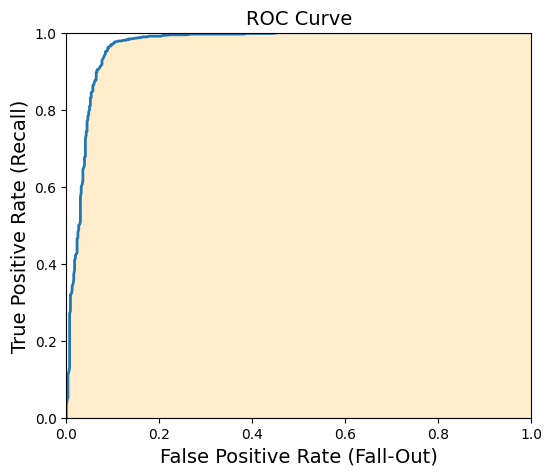

In [250]:
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_50, tpr_50, linewidth=2)
plt.fill_between(fpr_50, tpr_50, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

#### XGBoost Classifier

In [279]:
xgb_clf_50 = make_pipeline(preprocessing, XGBClassifier(random_state=42))

param_dist = {
    'xgbclassifier__n_estimators': [100, 300, 500, 800],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__min_child_weight': [1, 3, 5, 10],
    'xgbclassifier__gamma': [0, 0.1, 0.3, 0.5],
    'xgbclassifier__subsample': [0.5, 0.7, 1],
    'xgbclassifier__colsample_bytree': [0.5, 0.7, 1]
}

xgb_random_search_50 = RandomizedSearchCV(xgb_clf_50, param_distributions=param_dist,
                                   n_iter=20, scoring='roc_auc', cv=3, n_jobs=-1)

xgb_random_search_50.fit(X_train_50, y_train_good_50)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('annual_amount',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x11a0e8cc0>,
                                                                                                                    func=<function column_ratio at 0x11a0e8e00>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['amount',
                                                                                'dur...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'xgbclassifier__colsample_bytree': [0.5,
                                                                            0.7,
                                                                            1],
                                        'xgbclassifier__gamma': [0, 0.1, 0.3,
                                                                 0.5],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.05,
                                                                         0.1,
                                                                         0.3],
                                        'xgbclassifier__max_depth': [3, 5, 7,
                                                                     10],
                                        'xgbclassifier__min_child_weight': [1,
                                                                            3,
                                                                            5,
                                                                            10],
                                        'xgbclassifier__n_estimators': [100,
                                                                        300,
                                                                        500,
                                                                        800],
                                        'xgbclassifier__subsample': [0.5, 0.7,
                                                                     1]},
                   scoring='roc_auc')

In [280]:
print(f"Best hyperparameters: {xgb_random_search_50.best_params_}")
print(f"Best ROC AUC: {xgb_random_search_50.best_score_:.3f}")

Best hyperparameters: {'xgbclassifier__subsample': 0.7, 'xgbclassifier__n_estimators': 800, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 0.3, 'xgbclassifier__colsample_bytree': 0.7}
Best ROC AUC: 0.937


In [281]:
xgb_clf_50 = xgb_random_search_50.best_estimator_

In [282]:
y_probas_50 = cross_val_predict(xgb_clf_50, X_train_50, y_train_good_50, cv=5,
                                    method="predict_proba")
y_scores_50 = y_probas_50[:, 1]

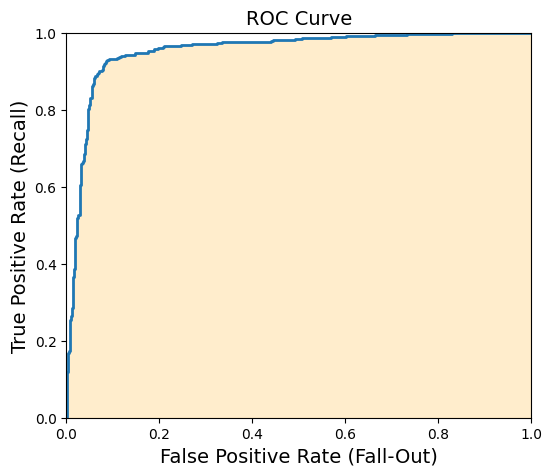

In [283]:
fpr_50, tpr_50, thresholds_50 = roc_curve(y_train_good_50, y_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_50, tpr_50, linewidth=2)
plt.fill_between(fpr_50, tpr_50, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

## Model Evaluation on the Test Set

In [251]:
X_test = test_set.drop('credit_risk', axis=1)
y_test = test_set['credit_risk']

y_test_good = (y_test == 'good')

### XGBoost Classifier (trained on a stratified set)

In [288]:
y_test_pred = xgb_clf.predict(X_test)
y_test_scores = xgb_clf.predict_proba(X_test)[:, 1]

In [289]:
from sklearn.metrics import classification_report

print(classification_report(y_test_good, y_test_pred))

              precision    recall  f1-score   support

       False       0.76      0.32      0.45        60
        True       0.77      0.96      0.85       140

    accuracy                           0.77       200
   macro avg       0.76      0.64      0.65       200
weighted avg       0.76      0.77      0.73       200



In [290]:
pr_auc_test = average_precision_score(y_test_good, y_test_scores)
pr_auc_test.round(3)

0.918

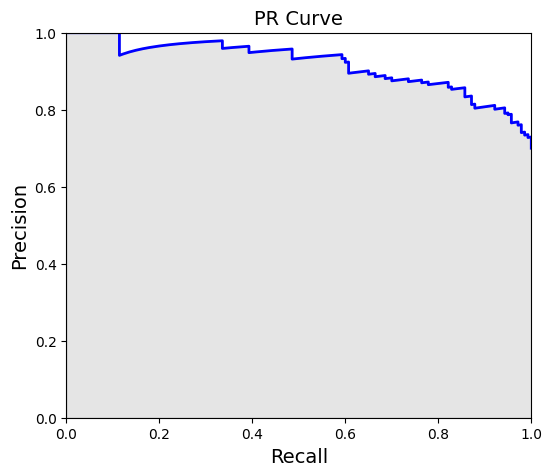

In [291]:
precision_t, recall_t, threshold_t = precision_recall_curve(y_test_good, y_test_scores)

plt.figure(figsize=(6, 5))  

plt.plot(recall_t, precision_t, "b-", linewidth=2)
plt.fill_between(recall_t, precision_t, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [292]:
round(precision_score(y_test_good, y_test_pred), 3), round(recall_score(y_test_good, y_test_pred), 3)

(0.766, 0.957)

In [293]:
threshold_for_90_precision = threshold_t[(precision_t >= 0.90).argmax()]

y_test_pred_90 = y_test_scores >= threshold_for_90_precision

print(f"Precision: {precision_score(y_test_good, y_test_pred_90):.3f}, Recall: {recall_score(y_test_good, y_test_pred_90):.3f}")

Precision: 0.901, Recall: 0.650


In [294]:
roc_auc_test = roc_auc_score(y_test_good, y_test_scores)
roc_auc_test.round(3)

0.836

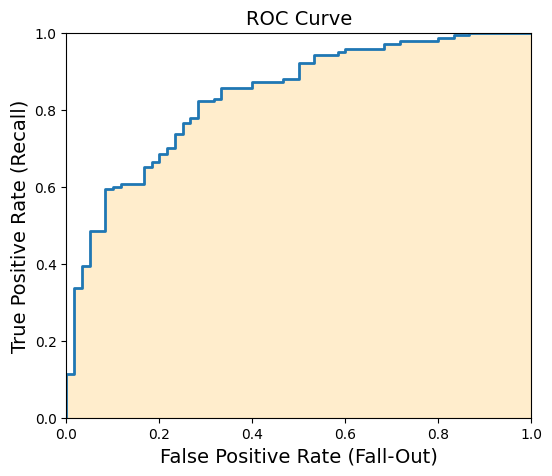

In [295]:
fpr_t, tpr_t, threshold_t = roc_curve(y_test_good, y_test_scores)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_t, tpr_t, linewidth=2)
plt.fill_between(fpr_t, tpr_t, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

### XGBosst Classifier (trained on an equal weight set)

In [297]:
y_test_pred_50 = xgb_clf_50.predict(X_test)
y_test_scores_50 = xgb_clf_50.predict_proba(X_test)[:, 1]

In [298]:
print(classification_report(y_test_good, y_test_pred_50))

              precision    recall  f1-score   support

       False       0.62      0.58      0.60        60
        True       0.83      0.85      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.77      0.77      0.77       200



In [299]:
round(precision_score(y_test_good, y_test_pred_50), 3), round(recall_score(y_test_good, y_test_pred_50), 3)

(0.826, 0.85)

In [300]:
roc_auc_test_50 = roc_auc_score(y_test_good, y_test_scores_50)
roc_auc_test_50.round(3)

0.815

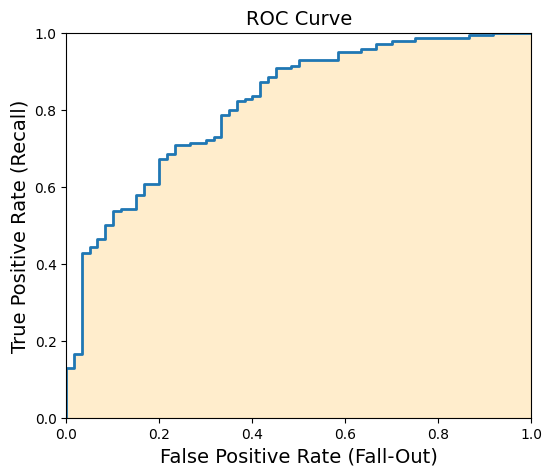

In [301]:
fpr_t, tpr_t, threshold_t = roc_curve(y_test_good, y_test_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_t, tpr_t, linewidth=2)
plt.fill_between(fpr_t, tpr_t, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [302]:
precision_t, recall_t, threshold_t = precision_recall_curve(y_test_good, y_test_scores_50)

threshold_for_90_precision_50 = threshold_t[(precision_t >= 0.90).argmax()]

y_test_pred_90_50 = y_test_scores_50 >= threshold_for_90_precision_50

print(f"Precision: {precision_score(y_test_good, y_test_pred_90_50):.3f}, Recall: {recall_score(y_test_good, y_test_pred_90_50):.3f}")

Precision: 0.900, Recall: 0.579


### Random Classifier (trained on a stratified set)

In [252]:
y_test_pred = rnd_clf.predict(X_test)
y_test_scores = rnd_clf.predict_proba(X_test)[:, 1]

In [253]:
print(classification_report(y_test_good, y_test_pred))

              precision    recall  f1-score   support

       False       0.83      0.33      0.48        60
        True       0.77      0.97      0.86       140

    accuracy                           0.78       200
   macro avg       0.80      0.65      0.67       200
weighted avg       0.79      0.78      0.75       200



In [254]:
pr_auc_test = average_precision_score(y_test_good, y_test_scores)
pr_auc_test.round(3)

0.932

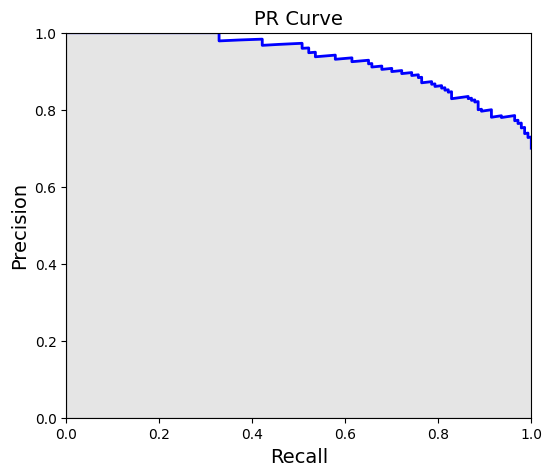

In [255]:
precision_t, recall_t, threshold_t = precision_recall_curve(y_test_good, y_test_scores)

plt.figure(figsize=(6, 5))  

plt.plot(recall_t, precision_t, "b-", linewidth=2)
plt.fill_between(recall_t, precision_t, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [256]:
round(precision_score(y_test_good, y_test_pred), 3), round(recall_score(y_test_good, y_test_pred), 3)

(0.773, 0.971)

In [257]:
threshold_for_90_precision = threshold_t[(precision_t >= 0.90).argmax()]

y_test_pred_90 = y_test_scores >= threshold_for_90_precision

print(f"Precision: {precision_score(y_test_good, y_test_pred_90):.3f}, Recall: {recall_score(y_test_good, y_test_pred_90):.3f}")

Precision: 0.902, Recall: 0.721


In [258]:
roc_auc_test = roc_auc_score(y_test_good, y_test_scores)
roc_auc_test.round(3)

0.846

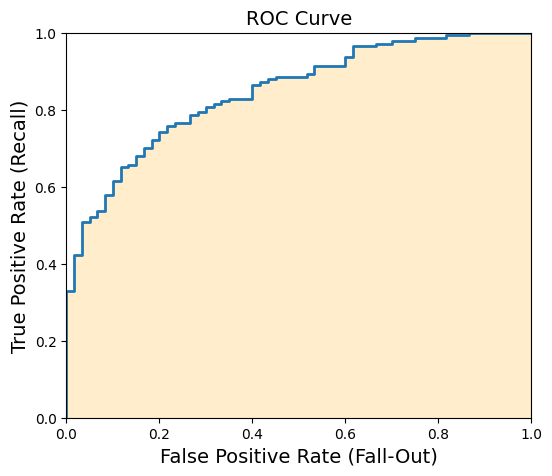

In [259]:
fpr_t, tpr_t, threshold_t = roc_curve(y_test_good, y_test_scores)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_t, tpr_t, linewidth=2)
plt.fill_between(fpr_t, tpr_t, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

### Random Classifier (trained on an equal weight set)

In [260]:
y_test_pred_50 = rnd_clf_50.predict(X_test)
y_test_scores_50 = rnd_clf_50.predict_proba(X_test)[:, 1]

In [261]:
print(classification_report(y_test_good, y_test_pred_50))

              precision    recall  f1-score   support

       False       0.69      0.52      0.59        60
        True       0.81      0.90      0.85       140

    accuracy                           0.79       200
   macro avg       0.75      0.71      0.72       200
weighted avg       0.78      0.79      0.78       200



In [262]:
round(precision_score(y_test_good, y_test_pred_50), 3), round(recall_score(y_test_good, y_test_pred_50), 3)

(0.813, 0.9)

In [263]:
roc_auc_test_50 = roc_auc_score(y_test_good, y_test_scores_50)
roc_auc_test_50.round(3)

0.834

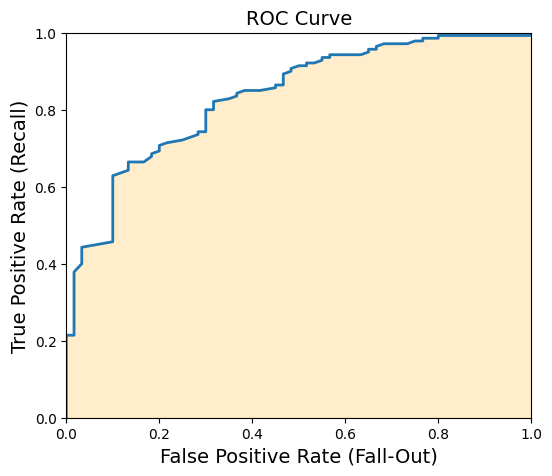

In [264]:
fpr_t, tpr_t, threshold_t = roc_curve(y_test_good, y_test_scores_50)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_t, tpr_t, linewidth=2)
plt.fill_between(fpr_t, tpr_t, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [265]:
precision_t, recall_t, threshold_t = precision_recall_curve(y_test_good, y_test_scores_50)

threshold_for_90_precision_50 = threshold_t[(precision_t >= 0.90).argmax()]

y_test_pred_90_50 = y_test_scores_50 >= threshold_for_90_precision_50

print(f"Precision: {precision_score(y_test_good, y_test_pred_90_50):.3f}, Recall: {recall_score(y_test_good, y_test_pred_90_50):.3f}")

Precision: 0.903, Recall: 0.664


### Logistic Classifier (trained on a stratified set)

In [266]:
y_test_pred = log_clf.predict(X_test)
y_test_scores = log_clf.predict_proba(X_test)[:, 1]

In [267]:
from sklearn.metrics import classification_report

print(classification_report(y_test_good, y_test_pred))

              precision    recall  f1-score   support

       False       0.72      0.52      0.60        60
        True       0.82      0.91      0.86       140

    accuracy                           0.80       200
   macro avg       0.77      0.72      0.73       200
weighted avg       0.79      0.80      0.78       200



In [268]:
pr_auc_test = average_precision_score(y_test_good, y_test_scores)
pr_auc_test.round(3)

0.927

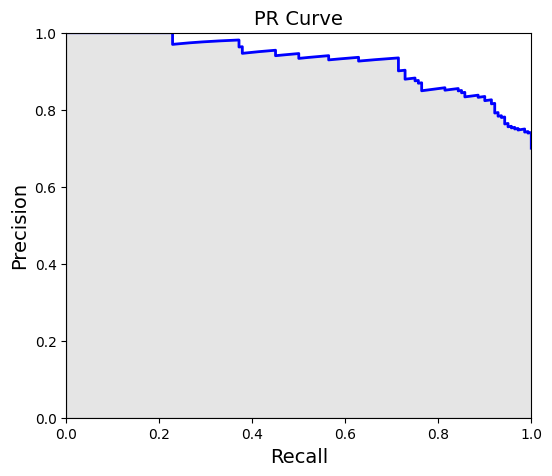

In [269]:
precision_t, recall_t, threshold_t = precision_recall_curve(y_test_good, y_test_scores)

plt.figure(figsize=(6, 5))  

plt.plot(recall_t, precision_t, "b-", linewidth=2)
plt.fill_between(recall_t, precision_t, alpha=0.2, color='grey') 

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])

plt.show()

In [270]:
round(precision_score(y_test_good, y_test_pred), 3), round(recall_score(y_test_good, y_test_pred), 3)

(0.815, 0.914)

In [271]:
threshold_for_90_precision = threshold_t[(precision_t >= 0.90).argmax()]

y_test_pred_90 = y_test_scores >= threshold_for_90_precision

print(f"Precision: {precision_score(y_test_good, y_test_pred_90):.3f}, Recall: {recall_score(y_test_good, y_test_pred_90):.3f}")

Precision: 0.903, Recall: 0.729


In [272]:
roc_auc_test = roc_auc_score(y_test_good, y_test_scores)
roc_auc_test.round(3)

0.844

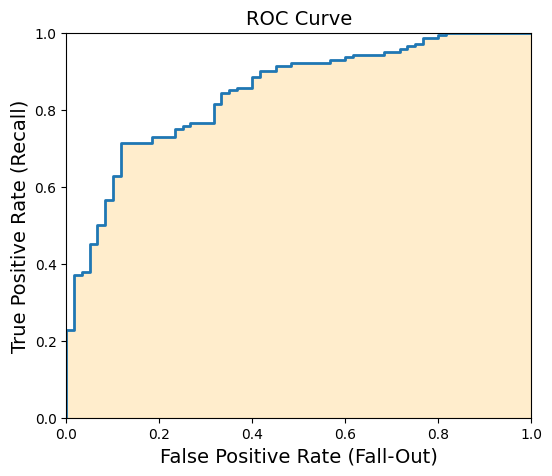

In [273]:
fpr_t, tpr_t, threshold_t = roc_curve(y_test_good, y_test_scores)

plt.figure(figsize=(6, 5))  
plt.plot(fpr_t, tpr_t, linewidth=2)
plt.fill_between(fpr_t, tpr_t, alpha=0.2, color='orange') 

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])

plt.show()